In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
skip = 1
numsteps = int(163 // skip)
ds_inputs_DE1 = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\saved_ML_datasets\\DE_ML_ERA5_2001_2024_full.csv')
ds_inputs_DE1[[f't2max at day {skip*n}' for n in range(numsteps)]] += -273.15
ds_inputs_DE1[[f't2min at day {skip*n}' for n in range(numsteps)]] += -273.15
ds_inputs_DE2 = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\results_for_comparing\\saved_ML_datasets\\DE_ML_ERA5_90s.csv')

ds_inputs_DE = pd.concat([ds_inputs_DE1, ds_inputs_DE2], axis = 0)
#ds_inputs_DE.loc[:, [f'temperature at day {n}' for n in range(200)]] = modelling_fctns.Wang_Engel_Temp_response(ds_inputs_DE.loc[:, [f'temperature at day {n}' for n in range(200)]], 7, 28, 42)
ds_inputs_DE=ds_inputs_DE.rename(columns={'Referenzjahr':'year'})
print(len(ds_inputs_DE))
ds_inputs_DE = ds_inputs_DE.dropna(how='all')
print(len(ds_inputs_DE))
ds_inputs_DE = ds_inputs_DE.loc[ds_inputs_DE['observed time to beginning of flowering'] < 140]
ds_inputs_DE = ds_inputs_DE.loc[ds_inputs_DE['observed time to beginning of flowering'] > 40]
new_series = []
ds_inputs_DE.loc[:, [f't2max at day {skip*n}' for n in range(numsteps)]] = ds_inputs_DE.loc[:, [f't2max at day {skip*n}' for n in range(numsteps)]].values - ds_inputs_DE.loc[:, [f't2m at day {skip*n}' for n in range(numsteps)]].values
ds_inputs_DE.loc[:, [f't2min at day {skip*n}' for n in range(numsteps)]] = ds_inputs_DE.loc[:, [f't2m at day {skip*n}' for n in range(numsteps)]].values - ds_inputs_DE.loc[:, [f't2min at day {skip*n}' for n in range(numsteps)]].values

27153
27153


In [ ]:
t2ms = ds_inputs_DE[[f't2m at day {n}' for n in range(120)]]
t2maxs = ds_inputs_DE[[f't2max at day {n}' for n in range(120)]]
t2mins = ds_inputs_DE[[f't2min at day {n}' for n in range(120)]]
photoperiods = ds_inputs_DE[[f'photoperiod at day {n}' for n in range(120)]]
vpds = ds_inputs_DE[[f'vpd at day {n}' for n in range(120)]]

In [ ]:
df_for_corrs = pd.DataFrame({'t2mean': t2ms.values.flatten(),
                             't2mean - t2min': t2mins.values.flatten(),
                             't2max - t2mean': t2maxs.values.flatten(),
                             'photoperiod': photoperiods.values.flatten(),
                             'vpd': vpds.values.flatten(),})

Text(0.5, 1.0, 'Correlations between features\nfor predicting flowering time')

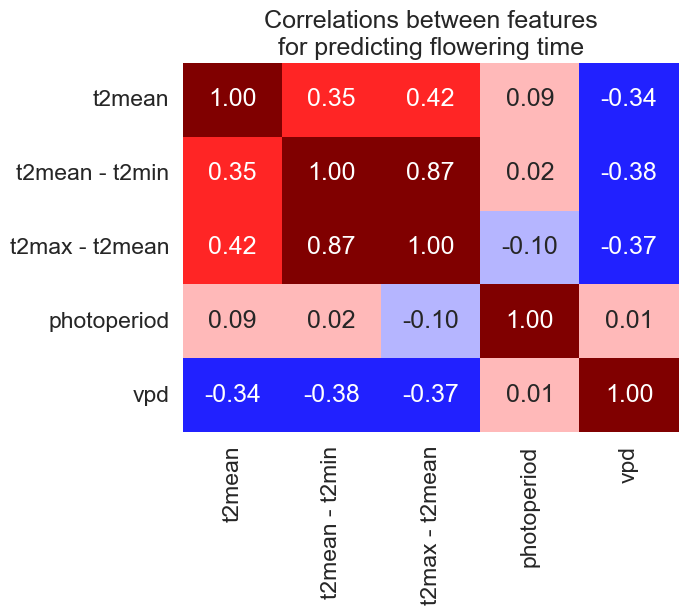

In [ ]:
negatives = -1
positives = 1
bounds_min = np.linspace(negatives, 0, 5)
bounds_max = np.linspace(0, positives, 5)[1:]
    # the zero is only needed once
    # in total there will be 257 bounds, so 256 bins
bounds = np.concatenate((bounds_min, bounds_max), axis=None)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
fig, ax = plt.subplots()
sns.heatmap(df_for_corrs.corr(), annot=True, cmap='seismic', fmt='.2f', norm=norm, cbar=False, ax = ax)
ax.set_title('Correlations between features\nfor predicting flowering time')
#sns.set(font_scale = 1.5)